In [0]:
!pip install --upgrade google-cloud-bigquery[pandas]

In [0]:
!pip install -U seaborn

In [0]:
import seaborn as sns

In [0]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
%%bigquery --project galvanic-ripsaw-136323 acc_sizes
select count(*) as size, 2012 as year from `RF_Companies_History_Accounting.Accounts_2012`
union all
select count(*) as size, 2013 as year from `RF_Companies_History_Accounting.Accounts_2013`
union all
select count(*) as size, 2014 as year from `RF_Companies_History_Accounting.Accounts_2014`
union all
select count(*) as size, 2015 as year from `RF_Companies_History_Accounting.Accounts_2015`
union all
select count(*) as size, 2016 as year from `RF_Companies_History_Accounting.Accounts_2016`
union all
select count(*) as size, 2017 as year from `RF_Companies_History_Accounting.Accounts_2017`

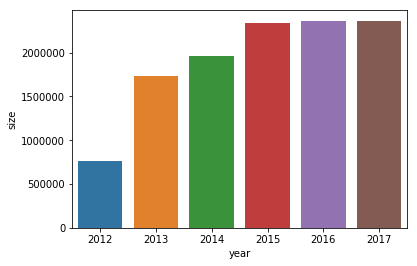

In [0]:
sns.barplot(x="year", y="size", data=acc_sizes);

In [0]:
acc_sizes

,size,year
0,1958019,2014
1,2334176,2015
2,1732549,2013
3,765813,2012
4,2364014,2016
5,2358754,2017


In [0]:
%%bigquery --project galvanic-ripsaw-136323 first_row
select * from `RF_Companies_History_Accounting.Accounts_2012` limit 1

,name,OKPO,OKOPF,OKFS,OKVED,INN,MeasureType,ReportType,_11103,_11104,...,_63223,_63233,_63243,_63253,_63263,_63303,_63503,_63003,_64003,date_updated
0,"Общество с ограниченной ответственностью ""Сиби...",00420239,65,16,51.90,2221043969,384,1,0,0,...,0,0,0,0,0,0,0,0,0,20130724


In [0]:
display(first_row[first_row > 0].T.dropna())

,0
name,"Общество с ограниченной ответственностью ""Сиби..."
OKPO,00420239
OKOPF,65
OKFS,16
OKVED,51.90
INN,2221043969
MeasureType,384
ReportType,1
_11503,3844
_11504,3601


In [0]:
all_columns = list(first_row.columns)

In [0]:
def column_code(column_name):
  return int(column_name[1:-1])

target_columns = ["_13703", "_13704"]
assert target_columns[0] in all_columns
assert target_columns[0] in all_columns
assert column_code(target_columns[0]) == column_code(target_columns[1])
print(column_code(target_columns[0]), "- target: profit/loss")

1370 - target: profit/loss


In [0]:
feature_columns = [column for column in all_columns if column[0] == '_']
print(len(feature_columns), '- features number (one year)')

257 - features number (one year)


In [0]:
%%bigquery --project galvanic-ripsaw-136323 acc_10000
(select *, 2012 as year from `RF_Companies_History_Accounting.Accounts_2012` order by INN limit 10000)
union all
(select *, 2013 as year from `RF_Companies_History_Accounting.Accounts_2013` order by INN limit 10000)
union all
(select *, 2014 as year from `RF_Companies_History_Accounting.Accounts_2014` order by INN limit 10000)
union all
(select *, 2015 as year from `RF_Companies_History_Accounting.Accounts_2015` order by INN limit 10000)
union all
(select *, 2016 as year from `RF_Companies_History_Accounting.Accounts_2016` order by INN limit 10000)
union all
(select *, 2017 as year from `RF_Companies_History_Accounting.Accounts_2017` order by INN limit 10000)

,name,OKPO,OKOPF,OKFS,OKVED,INN,MeasureType,ReportType,_11103,_11104,...,_63233,_63243,_63253,_63263,_63303,_63503,_63003,_64003,date_updated,year
0,"Общество с ограниченной ответственностью ""АЛЬФ...",60228717,65,16,63.40,0091601001,384,1,0,0,...,0,0,0,0,0,0,0,0,20130717,2012
1,"Общество с ограниченной ответственностью ""Здор...",97527961,65,16,52.25.11,0101000021,384,1,0,0,...,0,0,0,0,0,0,0,0,20130719,2012
2,"Общество с ограниченной ответственностью ""Быто...",16586999,65,16,52.31,0101000078,384,1,0,0,...,0,0,0,0,0,0,0,0,20130719,2012
3,Ликвидационная комиссия Государственного унита...,03433627,42,13,45.21.2,0101000430,384,2,0,0,...,0,0,0,0,0,0,0,0,20130613,2012
4,"Открытое акционерное общество ""Агрокомплекс Ги...",05053372,47,16,01.21,0101000511,384,1,0,0,...,0,0,0,0,0,0,0,0,20130719,2012
5,"Общество с ограниченной ответственностью ""Эллада""",16594705,65,16,26.70.2,0101000582,384,1,0,0,...,0,0,0,0,0,0,0,0,20130719,2012
6,"Муниципальное унитарное предприятие ""Гиагинска...",27681821,42,14,22.22,0101000695,384,2,0,0,...,0,0,0,0,0,0,0,0,20130613,2012
7,"Общество с ограниченной ответственностью ""Наде...",97527085,65,16,52.12,0101000737,384,1,0,0,...,0,0,0,0,0,0,0,0,20130719,2012
8,"Открытое акционерное общество Молочный завод ""...",00421380,47,16,15.51.4,0101000776,384,2,52,15,...,0,0,0,0,0,0,0,0,20130613,2012
9,"Открытое акционерное общество ""Гиагинский комб...",00940559,47,16,70.20.2,0101000825,384,1,0,0,...,0,0,0,0,0,0,0,0,20130719,2012


In [0]:
len(acc_10000)

60000

In [0]:
import numpy as np

acc_grouped = acc_10000.groupby('INN')['name'].count().reset_index()
acc_grouped = acc_grouped[acc_grouped['name'] == 3].INN.values
print(len(acc_grouped))
accs = acc_10000[np.isin(acc_10000.INN, acc_grouped)]
print(len(accs))

2350
7050


In [0]:
import pandas as pd

target_names = ['target_one_step', 'target_two_step']
data = accs[feature_columns + target_columns + ['year', 'INN']].copy()
data[target_names[0]] = 0
data[target_names[1]] = 0
dataset = None

for year in range(2012, 2016):
  year_data = pd.merge(
      data[data.year == year],
      data[data.year == year + 1][target_columns + ['INN']],
      on='INN', how='inner', suffixes=('', '_next')
  )
  year_data[target_names[0]] = year_data[target_columns[0] + "_next"].values + year_data[target_columns[1] + "_next"].values
  year_data = pd.merge(
      year_data,
      data[data.year == year + 2][target_columns + ['INN']],
      on='INN', how='inner', suffixes=('', '_next_next')
  )
  year_data[target_names[1]] = year_data[target_columns[0] + "_next_next"].values + year_data[target_columns[1] + "_next_next"].values
  if dataset is None:
    dataset = year_data[feature_columns + target_names]
  else:
    dataset = dataset.append(year_data[feature_columns + target_names], ignore_index=True)

print(len(dataset))

1917


In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X = MinMaxScaler().fit_transform(dataset[feature_columns].astype('float').values)
y_one = MinMaxScaler().fit_transform(dataset[target_names[0]].astype('float').values.reshape(-1, 1)).ravel()
y_two = MinMaxScaler().fit_transform(dataset[target_names[1]].astype('float').values.reshape(-1, 1)).ravel()

# X = dataset[feature_columns].astype('float').values
# y_one = dataset[target_names[0]].astype('float').values
# y_two = dataset[target_names[1]].astype('float').values

X, y_one, y_two = shuffle(X, y_one, y_two)

mlp = MLPRegressor([300, 300], random_state=1, activation='relu')
print('one step %.4f' % cross_val_score(mlp, X, y_one, cv=4).mean())

mlp = MLPRegressor([300, 300], random_state=1, activation='relu')
print('two step %.4f' % cross_val_score(mlp, X, y_two, cv=4).mean())

one step 0.3830
two step 0.2755
